In [1]:
# import necessary module

from sympy import *
init_printing()

import numpy as np
import matplotlib.pyplot as plt

# Turunan Numerik

Dengan menggunakan pendekatan deret taylor, diperoleh bentuk **turunan pertama** adalah :

*Forward finite difference* :

$$f'(x)\approx \frac{f(x+h)-f(x)}{h}+O(h)$$

*Backward finite difference*

$$f'(x)\approx \frac{f(x)-f(x-h)}{h}+O(h)$$

*Central finite difference*

$$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}+O(h^2)$$

dan bentuk **turunan kedua** adalah :

$$f''(x)\approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}+O(h^2)$$

**Soal yang digunakan untuk turunan adalah**

$$f(x) = \sqrt{\frac{2}{10}}\sin \left ( \frac{\pi x}{10} \right )$$

## Turunan Pertama

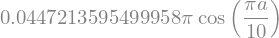

In [2]:
# ANALITIK

a = symbols("a")
sqrt(2/10)*diff(sin(pi*a/10), a)

In [3]:
# NUMERIK

# jumlah grid
N = 100

# panjang grid
L = 10

# panjang grid
dx = L/N

# data input
x = np.linspace(0, 10, N+1)

# fungsi yang akan diturunkan
fungsi = np.sqrt(2/10)*np.sin(np.pi*x/10)

# tempat menyimpan nilai
y_numerik_ffd = np.zeros(N+1)
y_numerik_bfd = np.zeros(N+1)
y_numerik_cfd = np.zeros(N+1)

#forward finite difference
for i in range(1, N):
    y_numerik_ffd[i] = (fungsi[i+1] - fungsi[i])/dx
    
#backward finite difference
for i in range(1, N):
    y_numerik_bfd[i] = (fungsi[i] - fungsi[i-1])/dx
    
# central finite difference
for i in range(1, N):
    y_numerik_cfd[i] = (fungsi[i+1] - fungsi[i-1])/(2*dx)

In [4]:
eksak = np.sqrt(2/10)*(np.pi/10)*np.cos(np.pi*x/10)

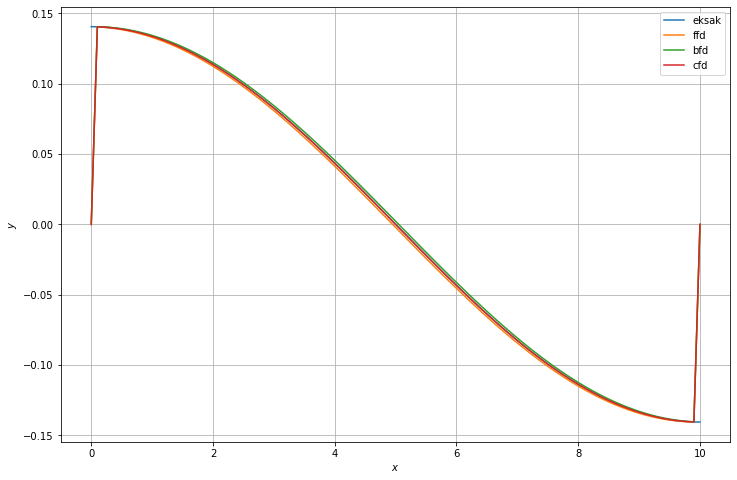

In [5]:
# plot

plt.figure(figsize=[12, 8])

plt.plot(x, eksak, label="eksak")
plt.plot(x, y_numerik_ffd, label="ffd")
plt.plot(x, y_numerik_bfd, label="bfd")
plt.plot(x, y_numerik_cfd, label="cfd")

plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Turunan Kedua

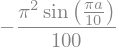

In [6]:
# ANALITIK

a = symbols("a")
diff(sin(pi*a/10), a, a)

In [7]:
# array tempat menyimpan nilai
y_diff2 = np.zeros(N+1)

# turunan kedua
for i in range(1, N):
    y_diff2[i] = (fungsi[i+1] - 2*fungsi[i] + fungsi[i-1])/(dx*dx)

In [8]:
eksak_2 = -np.sqrt(2/10)*(np.pi*np.pi/100)*np.sin(np.pi*x/10)

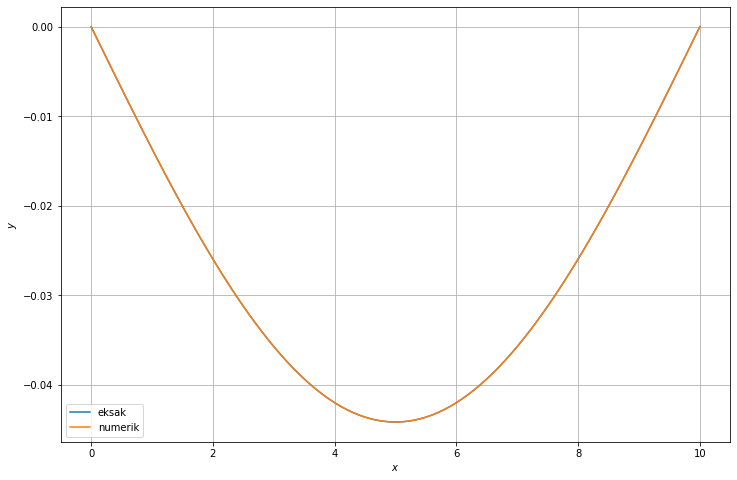

In [9]:
# plot
plt.figure(figsize=[12, 8])
plt.plot(x, eksak_2, label="eksak")
plt.plot(x, y_diff2, label="numerik")

plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# Integral Numerik

**Soal yang digunakan untuk integral numerik ini adalah :**

$$\int_{2}^{4}(-x^2+6x-8) dx$$

In [10]:
# solusi analitik
a = symbols("a")
_ = integrate(-a**2 + 6*a - 8, (a, 2, 4))
_.evalf()

## Metode Trapesium

Metode Trapesium dihitung dengan menghitung luas trapesium pada bawah kurva. Perhatikan gambar dibawah !

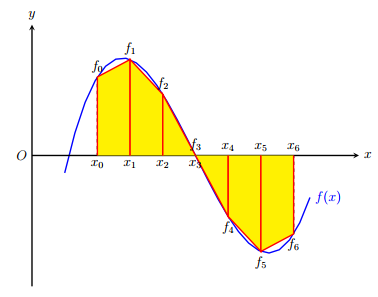

Gambar tersebut diatas terdiri dari bangun **Trapesium**, sehingga untuk menghitung integral kita hanya perlu menghitung luas trapesium dibawah kurva saja. Sebagai contoh untuk luas **Trapesium** yang pertama adalah :

$$I_{0} = \frac{(x_1 - x_0)}{2} (f_1 + f_0)$$

Supaya lebih umum, kita definisikan interval per Trapesium. Kita definisikan interval $h = \frac{a-b}{N}$, dengan $a$ dan $b$ adalah interval, dan $N$ adalah jumlah grid. Sehingga luas secara keseluruhan adalah :

$$I = \frac{h}{2}\left [ \sum_{n = 0}^{N-1}(f_n + f_{n+1}) \right ]$$

atau supaya lebih jelas

$$I = \int_{a}^{b}f(x)dx=\frac{h}{2}\left ( f_0 + f_N + 2\sum_{n=1}^{N-1}f_n \right )=\frac{h}{2}(f_0+2f_1+2f_2+\cdot\cdot\cdot+2f_{N-1}+f_N)$$

Penggunaan python untuk metode trapesium adalah sebagai berikut

In [11]:
# batas bawah
a = 2

# batas atas
b = 4

# jumlah grid
N = 100

# panjang grid / tinggi trapesium (h)
h = (b - a)/N

# data input
x = np.linspace(a, b, N+1)

# fungsi yang akan di integralkan
f = -x**2 + 6*x - 8

# metode trapesium
s = 0
for i in range(1, N):
    s += f[i]
hasil = (h/2)*(f[0] + 2*s + f[N])
print(hasil)

1.3332


## Metode Persegi

Metode ini mirip dengan metode trapesium. Hanya bentuk bangun datarnya yang diganti menjadi persegi.

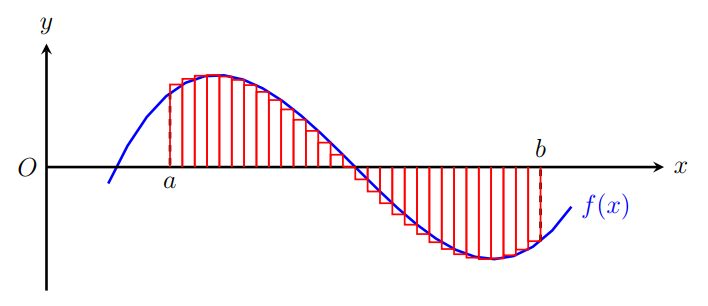

$$I = \int_{a}^{b}f(x)dx=\sum_{n=0}^{N}hf_n = h(f_0+f_1+f_2+\cdot\cdot\cdot+f_{N-1}+f_N)$$

In [12]:
# batas bawah
a = 2

# batas atas
b = 4

# jumlah grid
N = 100

# panjang grid / lebar persegi (h)
h = (b - a)/N

# data input
x = np.linspace(a, b, N+1)

# fungsi yang akan di integralkan
f = -x**2 + 6*x - 8

# metode trapesium
s = 0
for i in range(0, N+1):
    s += f[i]
hasil = h*s
print(hasil)

1.3332


*note : Metode trapesium lebih akurat dibanding persegi*

## Cara Looping biasa

$$I = \int_{a}^{b}f(x)dx=dx\sum_{n=0}^{N+1}f[n]$$

In [24]:
# batas atas
a = 2

# batas bawah 
b = 4

# jumlah grid
N = 100

# panjang grid
dx = (b - a)/N

# data input
x = np.linspace(a, b, N+1)

# fungsi yang akan di integralkan
f = -x**2 + 6*x - 8

hasil = 0
for i in range(N+1):
    hasil += f[i]
hasil *= dx
print(hasil)

1.3332
